In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data.csv')

In [2]:
unique_batters = data['batter'].unique()

for batter in unique_batters:
    print(batter)

AJ Finch
M Klinger
TM Head
MC Henriques
AJ Turner
JP Faulkner
N Dickwella
WU Tharanga
EMDY Munaweera
DAS Gunaratne
TAM Siriwardana
CK Kapugedera
S Prasanna
BR Dunk
TD Paine
PJ Cummins
AJ Tye
JA Richardson
BKG Mendis
KMDN Kulasekara
SL Malinga
MD Shanaka
JRMVB Sanjaya
KL Rahul
AT Rayudu
Mandeep Singh
MK Pandey
KM Jadhav
MS Dhoni
AR Patel
R Dhawan
CJ Chibhabha
H Masakadza
R Mutumbami
Sikandar Raza
MN Waller
CT Mutombodzi
E Chigumbura
AG Cremer
N Madziva
PJ Moor
DT Tiripano
T Muzarabani
DS Kulkarni
V Sibanda
T Maruma
Tamim Iqbal
Imrul Kayes
Sabbir Rahman
Shakib Al Hasan
Soumya Sarkar
Mahmudullah
Mosaddek Hossain
Mashrafe Mortaza
Nurul Hasan
Rubel Hossain
NT Broom
KS Williamson
C Munro
CJ Anderson
TC Bruce
C de Grandhomme
Mustafizur Rahman
L Ronchi
JDS Neesham
MJ Santner
GD Phillips
BM Wheeler
TG Southee
TA Boult
HM Amla
Q de Kock
F du Plessis
AB de Villiers
JP Duminy
F Behardien
CH Morris
WD Parnell
JJ Roy
AD Hales
JM Bairstow
JT Smuts
RR Hendricks
DA Miller
SW Billings
LS Livingstone
JC 

In [3]:
# Average score per match of a batsman
batsman_match_runs = data.groupby(['batter', 'match_id'])['runs_by_bat'].sum().reset_index()

batsman_avg_score = batsman_match_runs.groupby('batter')['runs_by_bat'].mean().reset_index()
batsman_avg_score.rename(columns={'runs_by_bat': 'average_score_per_match'}, inplace=True)

print(batsman_avg_score)

                batter  average_score_per_match
0          A Balbirnie                20.423077
1          A Dananjaya                 4.333333
2           A Flintoff                10.857143
3               A Khan                 2.000000
4             A Ndlovu                 8.333333
..                 ...                      ...
964         Zaman Khan                 4.000000
965       Ziaur Rahman                 9.000000
966      Zubaid Akbari                 5.000000
967     Zulfiqar Babar                 9.000000
968  Zulqarnain Haider                 9.000000

[969 rows x 2 columns]


In [4]:
# Maximum number of balls faced in each match
max_balls_faced = data.groupby(['batter', 'match_id'])['balls_faced'].max().reset_index()
print("max_balls_faced")
print(max_balls_faced)

max_balls_faced
                  batter                          match_id  balls_faced
0            A Balbirnie    Afghanistan_Ireland_2018-08-20            9
1            A Balbirnie    Afghanistan_Ireland_2018-08-22            1
2            A Balbirnie    Afghanistan_Ireland_2019-02-21            4
3            A Balbirnie    Afghanistan_Ireland_2019-02-23            4
4            A Balbirnie    Afghanistan_Ireland_2019-02-24           33
...                  ...                               ...          ...
14673     Zulfiqar Babar   Pakistan_West Indies_2014-04-01            4
14674     Zulfiqar Babar   West Indies_Pakistan_2013-07-27           17
14675     Zulfiqar Babar   West Indies_Pakistan_2013-07-28            6
14676  Zulqarnain Haider  Pakistan_South Africa_2010-10-26            4
14677  Zulqarnain Haider  Pakistan_South Africa_2010-10-27           17

[14678 rows x 3 columns]


In [5]:
# Sum up the maximum balls faced in each match
total_balls_faced = max_balls_faced.groupby('batter')['balls_faced'].sum().reset_index()

print(total_balls_faced)

                batter  balls_faced
0          A Balbirnie          887
1          A Dananjaya           72
2           A Flintoff           59
3               A Khan            4
4             A Ndlovu           32
..                 ...          ...
964         Zaman Khan            9
965       Ziaur Rahman           58
966      Zubaid Akbari            8
967     Zulfiqar Babar           27
968  Zulqarnain Haider           21

[969 rows x 2 columns]


In [6]:
# Calculate the total runs scored by each batsman
batsman_total_runs = data.groupby('batter')['runs_by_bat'].sum().reset_index()

print(batsman_total_runs)

                batter  runs_by_bat
0          A Balbirnie         1062
1          A Dananjaya           65
2           A Flintoff           76
3               A Khan            2
4             A Ndlovu           25
..                 ...          ...
964         Zaman Khan            8
965       Ziaur Rahman           72
966      Zubaid Akbari            5
967     Zulfiqar Babar           27
968  Zulqarnain Haider           18

[969 rows x 2 columns]


In [7]:
# Merge batsman_total_runs with max_balls_faced on the 'batter' column
batsman_strike_rate = pd.merge(batsman_total_runs, total_balls_faced, on='batter')

# Calculate strike rate
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['runs_by_bat'] / batsman_strike_rate['balls_faced']) * 100

print(batsman_strike_rate)

                batter  runs_by_bat  balls_faced  strike_rate
0          A Balbirnie         1062          887   119.729425
1          A Dananjaya           65           72    90.277778
2           A Flintoff           76           59   128.813559
3               A Khan            2            4    50.000000
4             A Ndlovu           25           32    78.125000
..                 ...          ...          ...          ...
964         Zaman Khan            8            9    88.888889
965       Ziaur Rahman           72           58   124.137931
966      Zubaid Akbari            5            8    62.500000
967     Zulfiqar Babar           27           27   100.000000
968  Zulqarnain Haider           18           21    85.714286

[969 rows x 4 columns]


In [8]:
# Merge the two metrics into a single DataFrame
batsman_metrics = pd.merge(batsman_avg_score, batsman_strike_rate[['batter', 'strike_rate']], on='batter')

print("Batsman Metrics before Clustering:")
print(batsman_metrics)

Batsman Metrics before Clustering:
                batter  average_score_per_match  strike_rate
0          A Balbirnie                20.423077   119.729425
1          A Dananjaya                 4.333333    90.277778
2           A Flintoff                10.857143   128.813559
3               A Khan                 2.000000    50.000000
4             A Ndlovu                 8.333333    78.125000
..                 ...                      ...          ...
964         Zaman Khan                 4.000000    88.888889
965       Ziaur Rahman                 9.000000   124.137931
966      Zubaid Akbari                 5.000000    62.500000
967     Zulfiqar Babar                 9.000000   100.000000
968  Zulqarnain Haider                 9.000000    85.714286

[969 rows x 3 columns]


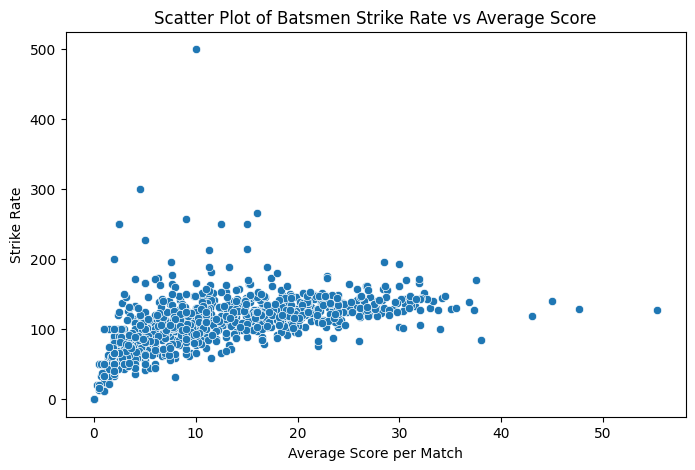

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=batsman_metrics, x='average_score_per_match', y='strike_rate')
plt.title('Scatter Plot of Batsmen Strike Rate vs Average Score')
plt.xlabel('Average Score per Match')
plt.ylabel('Strike Rate')
plt.show()